In [1]:
# Note: you only need to do this one time!
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# Import medals.csv: this file contains a break down of 
# how many Gold, Silver & Bronze Olympic medals each country 
# won. 

# This file will be imported as a Pandas dataframe. 
# We indicate which column in the file will act as the index in the df using index_col
medals = pd.read_csv('data/medals.csv', index_col=0)
medals

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
Rank,,,,,,
1,People's Republic of China,32,22,16,70,2
2,United States of America,25,30,22,77,1
3,Japan,21,7,12,40,5
4,Great Britain,15,18,15,48,4
5,Australia,15,4,17,36,6
...,...,...,...,...,...,...
79,Finland,0,0,1,1,71
79,Ghana,0,0,1,1,71
79,Kuwait,0,0,1,1,71


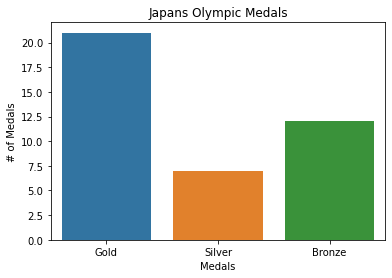

In [5]:
""" 
    Description of basic bar chart:

    sns.barplot(xAxis,yAxis)
    plt.title('Plot Title')
    plt.xlabel('X-Axis subtitle')
    plt.ylabel('Y-Axis subtitle')
    plt.show()
 
"""
# Let's choose a country and see how many medals they won
# In this example, let's choose Japan

medals_won = ['Gold', 'Silver', 'Bronze']
num_of_medals = [21,7,12]

sns.barplot(x=medals_won, y=num_of_medals)
plt.title('Japans Olympic Medals')
plt.xlabel('Medals')
plt.ylabel('# of Medals')
plt.show()



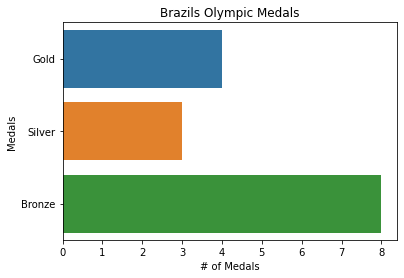

In [6]:
"""
Description of basic column chart:
plt.barh(y_axis,x_axis)
plt.title('title name')
plt.ylabel('y axis name')
plt.xlabel('x axis name')
plt.show()
"""
# Let's choose a country and see how many medals they won
# In this example, let's choose Brazil
medals_won = ['Gold', 'Silver', 'Bronze']
num_of_medals = [4,3,8]

# Here we use the orient parameter to distinguish that the bars will be horizontal. 
sns.barplot(x=num_of_medals, y=medals_won, orient = "h")
plt.title('Brazils Olympic Medals')
plt.xlabel('# of Medals')
plt.ylabel('Medals')
plt.show()

<AxesSubplot:title={'center':'Olympic Medals for 10 countries'}, xlabel='Team/NOC'>

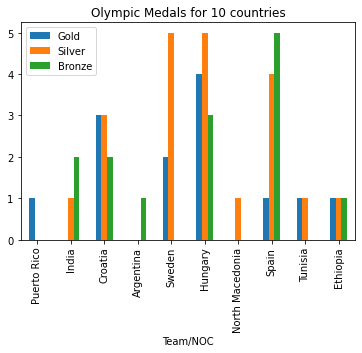

In [7]:
# Now let's compare 10 random countries with a 'Grouped Bar Chart'

# Used the sample function sample() to randomly sample 10 countries
ten_countries = medals.sample(n=10)

# Delete extra information
del ten_countries['Total']
del ten_countries['Rank by Total']

# Plot Grouped Bar plot
ten_countries.plot(x='Team/NOC',
                   kind='bar',
                   stacked=False,
                   title='Olympic Medals for 10 countries')

               Discipline  Female  Male  Total
0          3x3 Basketball      32    32     64
1                 Archery      64    64    128
2     Artistic Gymnastics      98    98    196
3       Artistic Swimming     105     0    105
4               Athletics     969  1072   2041
5               Badminton      86    87    173
6       Baseball/Softball      90   144    234
7              Basketball     144   144    288
8        Beach Volleyball      48    48     96
9                  Boxing     102   187    289
10           Canoe Slalom      41    41     82
11           Canoe Sprint     123   126    249
12  Cycling BMX Freestyle      10     9     19
13     Cycling BMX Racing      24    24     48
14  Cycling Mountain Bike      38    38     76
15           Cycling Road      70   131    201
16          Cycling Track      90    99    189
17                 Diving      72    71    143
18             Equestrian      73   125    198
19                Fencing     107   108    215
20           

<AxesSubplot:title={'center':'Gender Composition per sport'}, xlabel='Discipline'>

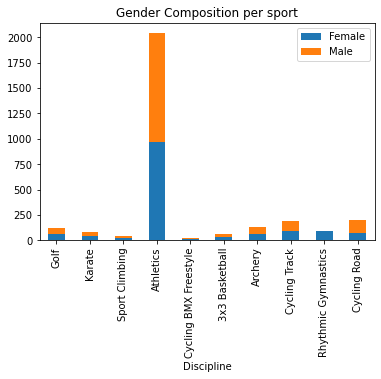

In [8]:
# Stacked Bar Plot

# Import EntriesGender.csv: this file has a breakdown of the # of men/women athletes for each sport. 
gender = pd.read_csv('data/EntriesGender.csv')
print(gender)

# plot data in stack manner of bar type
gender = pd.read_csv('data/EntriesGender.csv')
gender = gender[['Discipline', 'Female', 'Male']]
ten_sports = gender.sample(n=10)

# Note here I used matplotlib to make this graph. 
ten_sports.plot(x='Discipline', kind='bar', stacked=True,
        title='Gender Composition per sport')


             Entity  Year  Life expectancy
0         Australia  1802        34.049999
1         Australia  1803        34.049999
2         Australia  1804        34.049999
3         Australia  1805        34.049999
4         Australia  1806        34.049999
...             ...   ...              ...
3248  United States  2012        78.940002
3249  United States  2013        78.959999
3250  United States  2014        78.940002
3251  United States  2015        78.870003
3252  United States  2016        78.860001

[3253 rows x 3 columns]


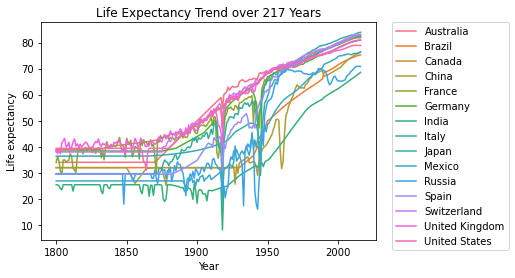

In [9]:
# Line Plot
life = pd.read_csv('data/Life_expectancy.csv')
# Here's what our data looks like
print(life)

sns.lineplot(data=life, x='Year', y='Life expectancy', hue='Entity').set(title='Life Expectancy Trend over 217 Years')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

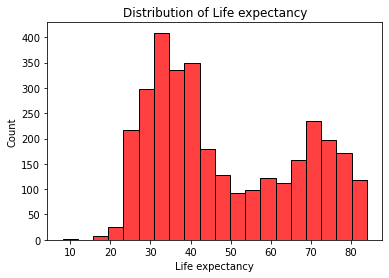

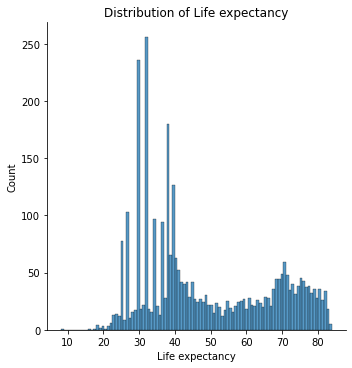

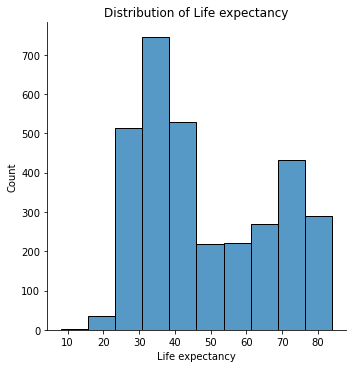

In [10]:
# Histogram
# Let's look at the distribution of life expectancy over 217 years

# Create Histogram with seaborn using either histplot() or displot()
# We can change the color using the color parameter
sns.histplot(life['Life expectancy'], color='red', bins=20).set(title='Distribution of Life expectancy')

# We can change the bin size using the bins parameter
sns.displot(life['Life expectancy'], bins=100).set(title='Distribution of Life expectancy')
sns.displot(life['Life expectancy'], bins=10).set(title='Distribution of Life expectancy')
#https://seaborn.pydata.org/generated/seaborn.distplot.html

[Text(0, 0, 'Australia'),
 Text(1, 0, 'Brazil'),
 Text(2, 0, 'Canada'),
 Text(3, 0, 'China'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'India'),
 Text(7, 0, 'Italy'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Mexico'),
 Text(10, 0, 'Russia'),
 Text(11, 0, 'Spain'),
 Text(12, 0, 'Switzerland'),
 Text(13, 0, 'United Kingdom'),
 Text(14, 0, 'United States')]

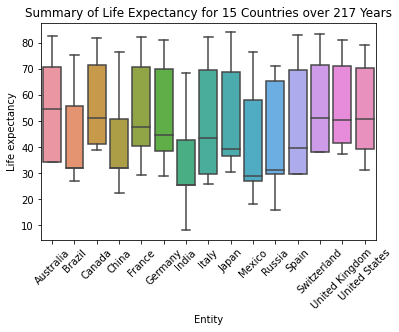

In [11]:
# Let's show the summary of life expectancy for each country using a Box Plot
ax = sns.boxplot(x="Entity", y="Life expectancy", data=life)
# Set the title of the plot
ax.set_title('Summary of Life Expectancy for 15 Countries over 217 Years')
# Rotate the labels on the x-axis for better readability
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

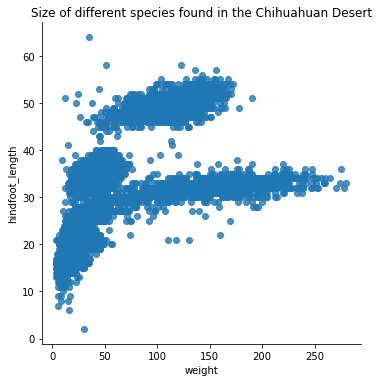

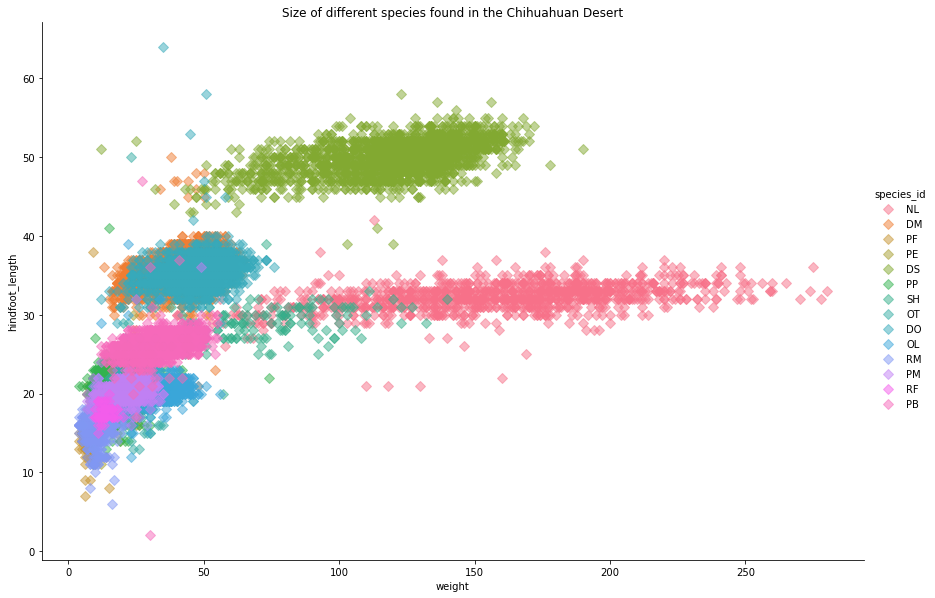

In [12]:
# Import surveys_complete.csv
surveys = pd.read_csv('data/surveys_complete.csv', index_col=0)

# Graph Scatter plot using Seaborn
sns.lmplot(x="weight", y="hindfoot_length", data=surveys, fit_reg=False)
plt.title('Size of different species found in the Chihuahuan Desert')
plt.show()

# Here we can distinguish between the different species using the hue parameter
sns.lmplot(x="weight", y="hindfoot_length", 
           data=surveys, fit_reg=False, height=8,
           aspect=1.5, scatter_kws={'alpha':0.5,"s": 50}, 
           hue='species_id', markers='D')
plt.title('Size of different species found in the Chihuahuan Desert')
plt.show()

In [13]:
print(surveys)

       record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
1            845      5    6  1978        2         NL   M               32   
2           1164      8    5  1978        2         NL   M               34   
3           1261      9    4  1978        2         NL   M               32   
4           1756      4   29  1979        2         NL   M               33   
5           1818      5   30  1979        2         NL   M               32   
...          ...    ...  ...   ...      ...        ...  ..              ...   
30459      32477      8   25  2001        7         PB   M               28   
30460      33103     11   17  2001        7         PB   M               28   
30461      33305     12   15  2001        7         PB   M               29   
30462      34524      7   13  2002        7         PB   M               25   
30463      35382     12    8  2002        7         PB   M               26   

       weight        genus   species    taxa       